<a href="https://colab.research.google.com/github/DB11051998/gamereview-sentiment/blob/master/gamereview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive .mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
root_path='/content/gdrive/My Drive/jantahack/NLP jantahack'

In [0]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
lis=[]
for dirname, _, filenames in os.walk(root_path):
    for filename in filenames:
        lis.append(os.path.join(dirname, filename))

In [0]:
lis

['/content/gdrive/My Drive/jantahack/NLP jantahack/test.csv',
 '/content/gdrive/My Drive/jantahack/NLP jantahack/train.csv',
 '/content/gdrive/My Drive/jantahack/NLP jantahack/game_overview.csv',
 '/content/gdrive/My Drive/jantahack/NLP jantahack/test_BppAoe0.zip',
 '/content/gdrive/My Drive/jantahack/NLP jantahack/train_E52nqFa.zip',
 '/content/gdrive/My Drive/jantahack/NLP jantahack/sample_submission_wgBqZCk.csv',
 '/content/gdrive/My Drive/jantahack/NLP jantahack/__MACOSX/._test.csv',
 '/content/gdrive/My Drive/jantahack/NLP jantahack/__MACOSX/._train.csv',
 '/content/gdrive/My Drive/jantahack/NLP jantahack/__MACOSX/._game_overview.csv']

In [0]:
df_train=pd.read_csv(lis[1])

In [0]:
df_train.head(10)

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1
5,6,Spooky's Jump Scare Mansion,2015.0,"Early Access ReviewIt's pretty cute at first, ...",1
6,7,Spooky's Jump Scare Mansion,2017.0,Great game. it's a cute little horror game tha...,1
7,8,Spooky's Jump Scare Mansion,2015.0,Spooky's Jump Scare Mansion is a Free Retro ma...,1
8,9,Spooky's Jump Scare Mansion,2015.0,"Somewhere between light hearted, happy parody ...",0
9,10,Spooky's Jump Scare Mansion,2015.0,This game with its cute little out of the wall...,1


In [0]:
df_train.shape

(17494, 5)

In [0]:
df_train.isna().any()

review_id          False
title              False
year                True
user_review        False
user_suggestion    False
dtype: bool

In [0]:
df_train[df_train.year.isna()]['title'].unique()

32

In [0]:
df_train.user_suggestion.value_counts()

1    9968
0    7526
Name: user_suggestion, dtype: int64

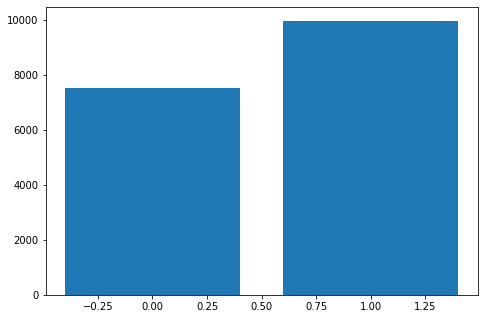

In [0]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df_train.user_suggestion.unique(),df_train.user_suggestion.value_counts())
plt.show()

In [0]:
df_game_overview=pd.read_csv(lis[2])

In [0]:
len(df_train.title.unique())

44

In [0]:
df_train.user_review[8]

"Somewhere between light hearted, happy parody and being afraid of the dark lies Spooky's House of Jump Scares. You are tasked with the daunting duty of surviving one thousand rooms in this endless first person perspective runner. Each room is no more than a few seconds thanks to a sprint key and the fact that each door counts as a new room. Even then one thousand rooms is still a feat against tedium and needless repetition. There are still things every fifteen or so rooms to keep your interest and at the end of fifty rooms you'll find a save point, but nothing can save you from permanent death at the hands of the foul creatures that live within.On the surface the game has a clean, chipper almost cartoon low budget charm to it. Jump scares are rare and at first it comes in the form of adorable cardboard cutouts of pumpkins, ghosts and skeletons that pop out of the wall accompanied by a sound. Some of the sounds are silly and unfitting other times its screeches to drive chills down your

In [0]:
#import library
import nltk
import re
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer 


In [0]:
#no of words 
ls=[]
def no_of_words(df):
  return(ls.append(word_tokenize(df)))

In [0]:
stop_words = set(stopwords.words('english'))

In [0]:
df_train.user_review.apply(no_of_words)

0        None
1        None
2        None
3        None
4        None
         ... 
17489    None
17490    None
17491    None
17492    None
17493    None
Name: user_review, Length: 17494, dtype: object

In [0]:
def preprocess(df):
  #lowercase all characters
  #remove all symbols
  #tokenize the sentence to words
  x=re.sub(r'[^\w]', ' ', df)
  word_tokenize1=word_tokenize(re.sub('(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)', '', x).lower())  
  #remove the stopwords
  filter1=[]
  for w in word_tokenize1: 
        if w not in stop_words: 
            filter1.append(w)
  filtered_full=np.array(filter1)
  return np.array(filtered_full)

In [0]:
filter1=[]
for w in word_tokenize(re.sub('(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)', '', x).lower()): 
      if w not in stop_words: 
          filter1.append(w)

In [0]:
y=df_train['user_review'].apply(preprocess)

In [0]:
y

0        [scared, hearing, creepy, voices, pause, momen...
1        [best, game, better, sam, pepper, youtube, acc...
2        [littly, iffy, controls, know, play, easy, mas...
3        [great, game, fun, colorful, side, note, thoug...
4        [many, games, cute, tag, right, next, horror, ...
                               ...                        
17489    [arguably, single, greatest, mmorp, exists, to...
17490    [older, game, sure, charm, holds, special, pla...
17491    [frist, started, playing, everquest, 2, amazin...
17492    [cool, game, thing, really, pisses, ridable, t...
17493    [game, since, little, kid, always, since, stil...
Name: user_review, Length: 17494, dtype: object

In [0]:
pd.read_csv('/content/gdrive/My Drive/jantahack/NLP jantahack/game_overview.csv').tags[0]

"['Horror', 'Free to Play', 'Cute', 'First-Person', 'Singleplayer', 'Psychological Horror', 'Indie', 'Adventure', 'Dark', 'Funny', 'Atmospheric', 'Action', 'Walking Simulator', 'Survival', 'Survival Horror', 'Anime', 'Gore', 'Comedy', 'Multiplayer', 'Illuminati']"

In [0]:
df_tokenize=pd.DataFrame(df_train,columns=['title'])

In [0]:
lemmatizer=WordNetLemmatizer()
print(lemmatizer.lemmatize('rooms')) 

room


In [0]:
df_tokenize['tokenized']=y

In [0]:
df_tokenize

,title,tokenized
0,Spooky's Jump Scare Mansion,"[scared, hearing, creepy, voices, pause, momen..."
1,Spooky's Jump Scare Mansion,"[best, game, better, sam, pepper, youtube, acc..."
2,Spooky's Jump Scare Mansion,"[littly, iffy, controls, know, play, easy, mas..."
3,Spooky's Jump Scare Mansion,"[great, game, fun, colorful, side, note, thoug..."
4,Spooky's Jump Scare Mansion,"[many, games, cute, tag, right, next, horror, ..."
...,...,...
17489,EverQuest II,"[arguably, single, greatest, mmorp, exists, to..."
17490,EverQuest II,"[older, game, sure, charm, holds, special, pla..."
17491,EverQuest II,"[frist, started, playing, everquest, 2, amazin..."
17492,EverQuest II,"[cool, game, thing, really, pisses, ridable, t..."


In [0]:
def stemming(df):
  ls=[]
  ps = PorterStemmer()
  for w in df:
    ls.append(ps.stem(w))
  filtered_full=np.array(ls)
  return np.array(filtered_full)

In [0]:
z=df_tokenize.tokenized.apply(stemming)

In [0]:
z

0        [scare, hear, creepi, voic, paus, moment, writ...
1        [best, game, better, sam, pepper, youtub, acco...
2        [littli, iffi, control, know, play, easi, mast...
3        [great, game, fun, color, side, note, though, ...
4        [mani, game, cute, tag, right, next, horror, t...
                               ...                        
17489    [arguabl, singl, greatest, mmorp, exist, today...
17490    [older, game, sure, charm, hold, special, plac...
17491    [frist, start, play, everquest, 2, amaz, still...
17492    [cool, game, thing, realli, piss, ridabl, tran...
17493    [game, sinc, littl, kid, alway, sinc, still, r...
Name: tokenized, Length: 17494, dtype: object

In [0]:
ps = PorterStemmer() 
for w in y[8]: 
    print(w, " : ", ps.stem(w))

somewhere  :  somewhere
light  :  light
hearted  :  hearted
happy  :  happy
parody  :  parody
afraid  :  afraid
dark  :  dark
lies  :  lie
spooky  :  spooky
house  :  house
jump  :  jump
scares  :  scare
tasked  :  tasked
daunting  :  daunting
duty  :  duty
surviving  :  surviving
one  :  one
thousand  :  thousand
rooms  :  room
endless  :  endless
first  :  first
person  :  person
perspective  :  perspective
runner  :  runner
room  :  room
seconds  :  second
thanks  :  thanks
sprint  :  sprint
key  :  key
fact  :  fact
door  :  door
counts  :  count
new  :  new
room  :  room
even  :  even
one  :  one
thousand  :  thousand
rooms  :  room
still  :  still
feat  :  feat
tedium  :  tedium
needless  :  needle
repetition  :  repetition
still  :  still
things  :  thing
every  :  every
fifteen  :  fifteen
rooms  :  room
keep  :  keep
interest  :  interest
end  :  end
fifty  :  fifty
rooms  :  room
find  :  find
save  :  save
point  :  point
nothing  :  nothing
save  :  save
permanent  :  perma

In [0]:
words,count=np.unique(z[8], return_counts=True)

In [0]:
len(words)

295

In [0]:
dic={}
for i in range(len(words)):
  dic[words[i]]=count[i]

In [0]:
dic

{'350': 1,
 '3d': 1,
 '45': 1,
 'accept': 2,
 'accompani': 1,
 'across': 1,
 'act': 1,
 'adjac': 1,
 'ador': 1,
 'afraid': 1,
 'almost': 2,
 'alreadi': 1,
 'ambient': 1,
 'amount': 1,
 'anoth': 6,
 'anyth': 1,
 'area': 1,
 'asylum': 1,
 'avoid': 1,
 'away': 1,
 'balanc': 1,
 'begin': 1,
 'behind': 2,
 'best': 1,
 'beyond': 1,
 'big': 1,
 'black': 1,
 'box': 2,
 'break': 1,
 'bright': 1,
 'bring': 1,
 'budget': 1,
 'calm': 1,
 'cardboard': 3,
 'cartoon': 1,
 'catch': 1,
 'ceil': 1,
 'chanc': 1,
 'chang': 1,
 'charm': 2,
 'chase': 2,
 'chasm': 1,
 'cheap': 1,
 'chill': 1,
 'chime': 1,
 'chipper': 1,
 'clean': 1,
 'coat': 1,
 'coffe': 1,
 'combin': 1,
 'come': 1,
 'comput': 1,
 'corner': 1,
 'correct': 1,
 'corridor': 2,
 'could': 1,
 'count': 1,
 'creatur': 3,
 'crescendo': 1,
 'cutout': 3,
 'dank': 1,
 'dark': 3,
 'darker': 1,
 'daunt': 1,
 'dead': 1,
 'death': 1,
 'deeper': 1,
 'delv': 1,
 'depart': 1,
 'deplet': 1,
 'differ': 1,
 'difficult': 1,
 'divers': 2,
 'door': 5,
 'dread': 3,


In [0]:
print(df_train.iloc[8].user_review)

Somewhere between light hearted, happy parody and being afraid of the dark lies Spooky's House of Jump Scares. You are tasked with the daunting duty of surviving one thousand rooms in this endless first person perspective runner. Each room is no more than a few seconds thanks to a sprint key and the fact that each door counts as a new room. Even then one thousand rooms is still a feat against tedium and needless repetition. There are still things every fifteen or so rooms to keep your interest and at the end of fifty rooms you'll find a save point, but nothing can save you from permanent death at the hands of the foul creatures that live within.On the surface the game has a clean, chipper almost cartoon low budget charm to it. Jump scares are rare and at first it comes in the form of adorable cardboard cutouts of pumpkins, ghosts and skeletons that pop out of the wall accompanied by a sound. Some of the sounds are silly and unfitting other times its screeches to drive chills down your 

'issu'